## X.8.9

Рассмотрим электрический контур с последовательно соединенными
элементами: индуктивностью L = 1 Гн, сопротивлением R = 1000 Ом и
емкостью C = 6.25·10–6 Ф. Начальный заряд в контуре равен нулю, и в
момент времени t = 0 к нему прикладывается постоянная ЭДС E = 24 В.
Требуется определить величину тока в момент времени t = 0.1. Для этого
нужно решить следующее дифференциальное уравнение:

$\frac{d^2Q}{dt^2} + R\frac{dQ}{dt}+\frac{Q}{C} = E$

с начальными условиями:

$Q(0) = 0, \frac{dQ(0)}{dt} = 5$

и вычислить величину тока $I(t=0.1)$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
E = 24
R = 1000
L = 1
C = 6.25*10**-6
T = 0.1

Q0 = 0
P0 = 5

Enter count of steps: 10000
I(t = 0.1) = -3.420456239425218e-09

A:
[[ 9.99984156e-01  9.90181360e-06]
 [-1.58429018e+00  9.90082342e-01]]
B:
[[2.37667293e-09]
 [2.37643526e-04]]


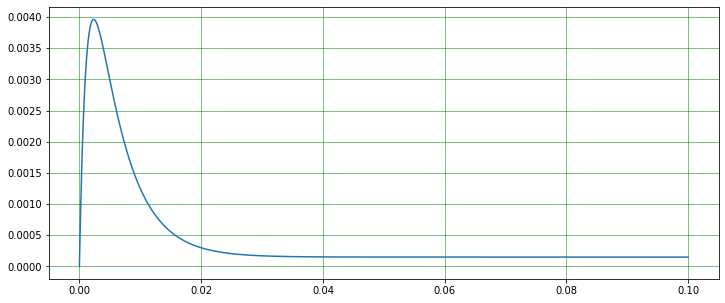

In [42]:
N = int(input('Enter count of steps: ').strip())
dt = T / (N-1)
t = np.linspace(0, T, N)
q, p = np.zeros(N), np.zeros(N)
q[0] = Q0
p[0] = P0


denom = 1/(L*C) + R/(L*dt) + 1/(dt*dt)

a11 = (1/(dt*dt) + R/(L*dt)) / denom
a12 = 1 / (dt * denom)
a21 = -1 / (L*C*dt*denom)
a22 = 1 / (dt*dt*denom)

b1 = E / (L * denom)
b2 = E / (L*dt * denom)

A = np.array([[a11, a12],
              [a21, a22]])
b = np.array([[b1], [b2]])

for n in range(1, N):
    q[n] = q[n-1]*a11 + p[n-1]*a12 + b1
    p[n] = q[n-1]*a21 + p[n-1]*a22 + b2

print('I(t = 0.1) =', p[-1])
print('\nA:', A, 'B:', b, sep = '\n')

plt.figure(figsize = (12, 5))
plt.grid(True, color='g', linewidth=0.5)
plt.plot(t, q)

### Интересно, что при замене сопротивления с 1000 Ом на 100 Ом, меняется характер решения:

Enter count of steps: 10000
I(t = 0.1) = -0.015311988875606603

A:
[[ 9.99984013e-01  9.99084837e-06]
 [-1.59853574e+00  9.98984928e-01]]
B:
[[2.39804341e-09]
 [2.39780361e-04]]


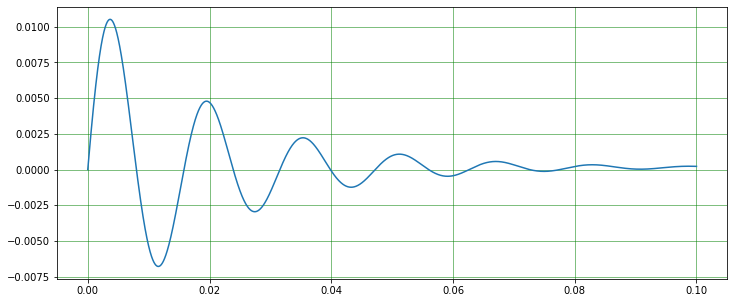

In [43]:
R=100
N = int(input('Enter count of steps: ').strip())
dt = T / (N-1)
t = np.linspace(0, T, N)
q, p = np.zeros(N), np.zeros(N)
q[0] = Q0
p[0] = P0


denom = 1/(L*C) + R/(L*dt) + 1/(dt*dt)

a11 = (1/(dt*dt) + R/(L*dt)) / denom
a12 = 1 / (dt * denom)
a21 = -1 / (L*C*dt*denom)
a22 = 1 / (dt*dt*denom)

b1 = E / (L * denom)
b2 = E / (L*dt * denom)

A = np.array([[a11, a12],
              [a21, a22]])
b = np.array([[b1], [b2]])

for n in range(1, N):
    q[n] = q[n-1]*a11 + p[n-1]*a12 + b1
    p[n] = q[n-1]*a21 + p[n-1]*a22 + b2

print('I(t = 0.1) =', p[-1])
print('\nA:', A, 'B:', b, sep = '\n')

plt.figure(figsize = (12, 5))
plt.grid(True, color='g', linewidth=0.5)
plt.plot(t, q)